Read  5184


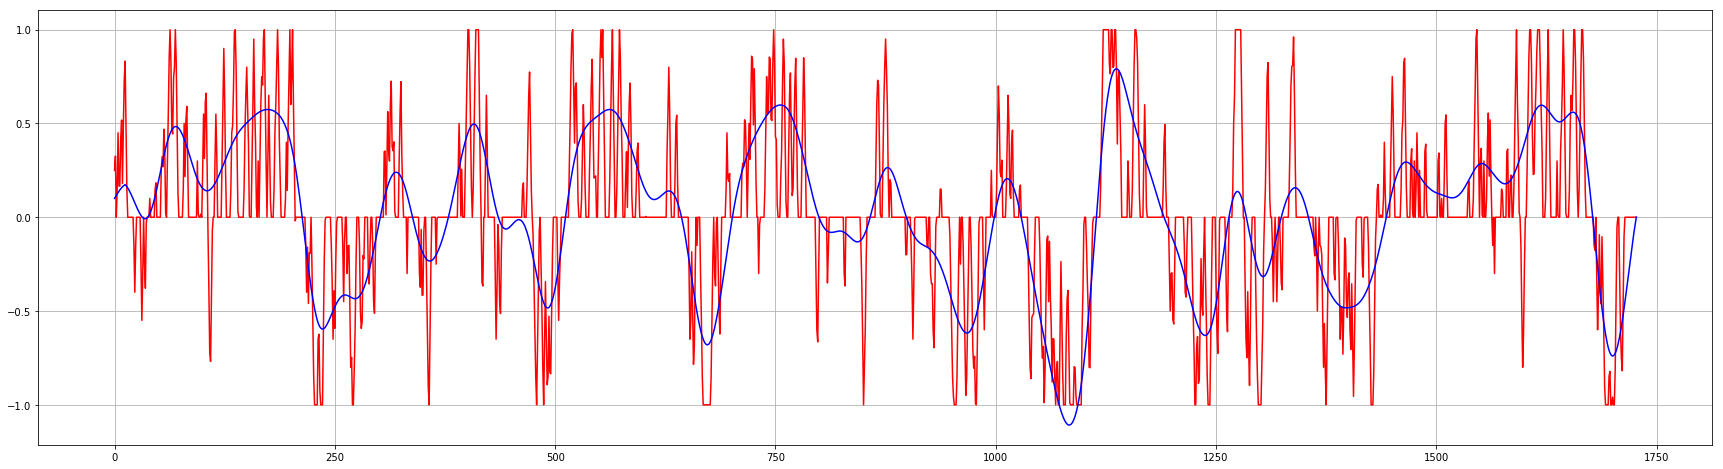

In [5]:
"""
Filter test
"""
import utils
import numpy as np
import matplotlib.pyplot as plt

def running_mean(x, N, gain=1.0):
    """
    Smooth the steering data. Since filtering reduce the magnitude of the
    steering, we need to amplify the steering by some factor
    """
    N = int(N)
    x_ = [s * gain for s in x]
    # modes = ['full', 'same', 'valid']
    return np.convolve(x_, np.ones((N,)) / N, mode='same')


def filter_steering(samples, N, plot=False):
    """
    Filter the steering data in the samples
    """
    steerings = [sample[utils.INDEX_STEER] for sample in samples]
    # new_steerings = running_mean(steerings, N)

    new_steerings = running_mean(steerings, 2,1.5)
    new_steerings = running_mean(new_steerings, 8,1.0)
    new_steerings = running_mean(new_steerings, 16,1.0)
    new_steerings = running_mean(new_steerings, 32,1.0)
    new_steerings = running_mean(new_steerings, 24,1.0)
    #new_steerings = running_mean(new_steerings, 128,1.0)
    
#     new_steerings = running_mean(steerings, 32,1.1)
#     new_steerings = running_mean(new_steerings, 64,1.5)
#     new_steerings = running_mean(new_steerings, 128,2.0)

    filtered_samples = []

    for sample, steering in zip(samples, new_steerings):
        sample_ = sample[:]
        sample_[utils.INDEX_STEER] = steering
        filtered_samples.append(sample_)

    if plot:
        plot_length = int(len(samples) / 3)
        # plot_length = len(samples)
        steerings = [sample[utils.INDEX_STEER] for sample in samples[0:plot_length]]
        steerings_f = [sample[utils.INDEX_STEER]
                       for sample in filtered_samples[0:plot_length]]
        plt.figure(figsize=(30, 8))
        plt.plot(steerings, 'r', steerings_f, 'b')
        plt.grid(True)
        plt.show()

    return filtered_samples

path = 'data/track2-test/'
samples = utils.csv2samples(path)
samples = filter_steering(samples,32,True)

Using TensorFlow backend.


Read  5184


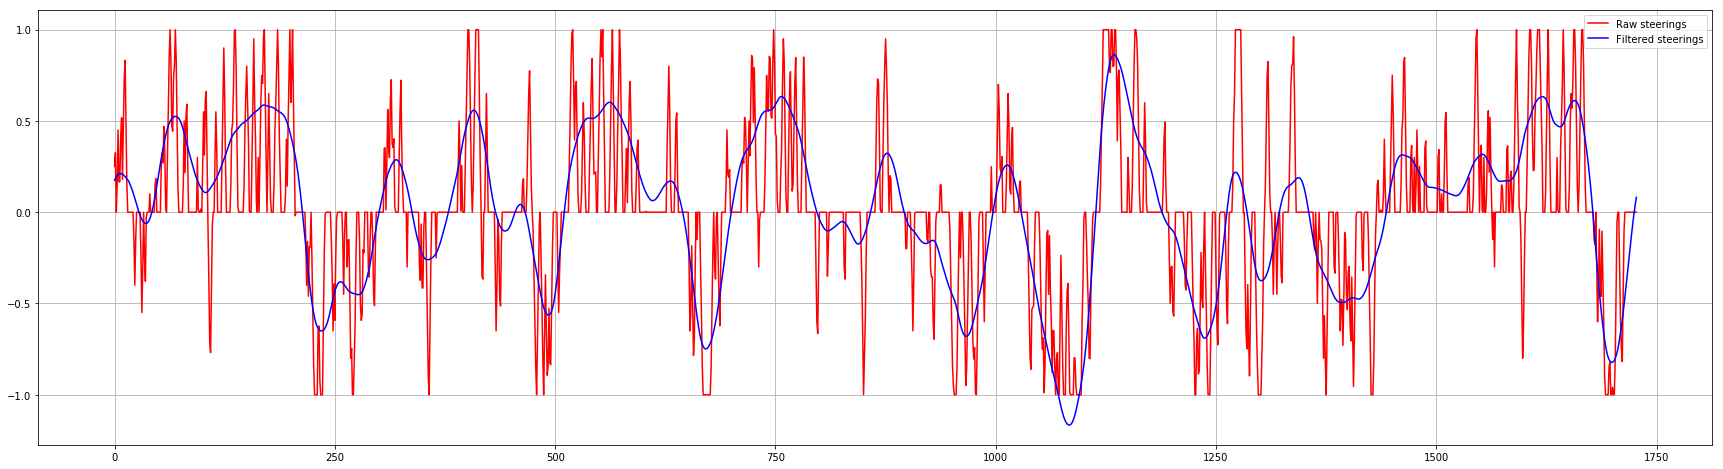

Samples are reduce from  5184  to  5118


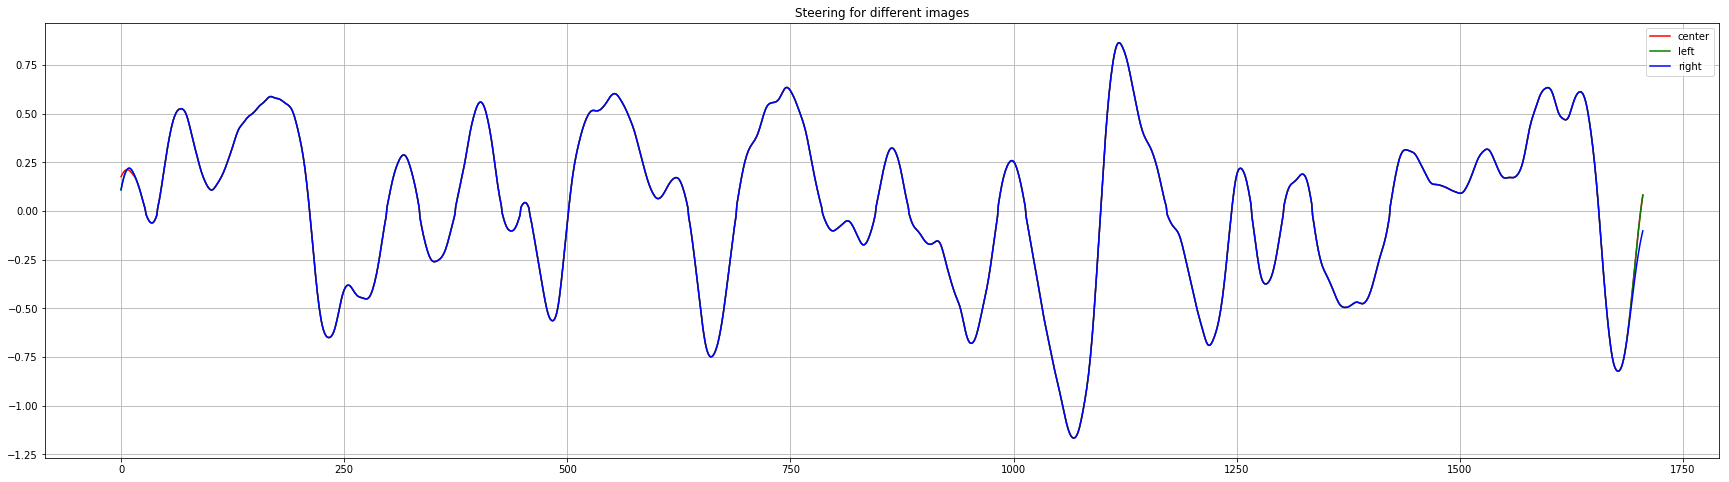

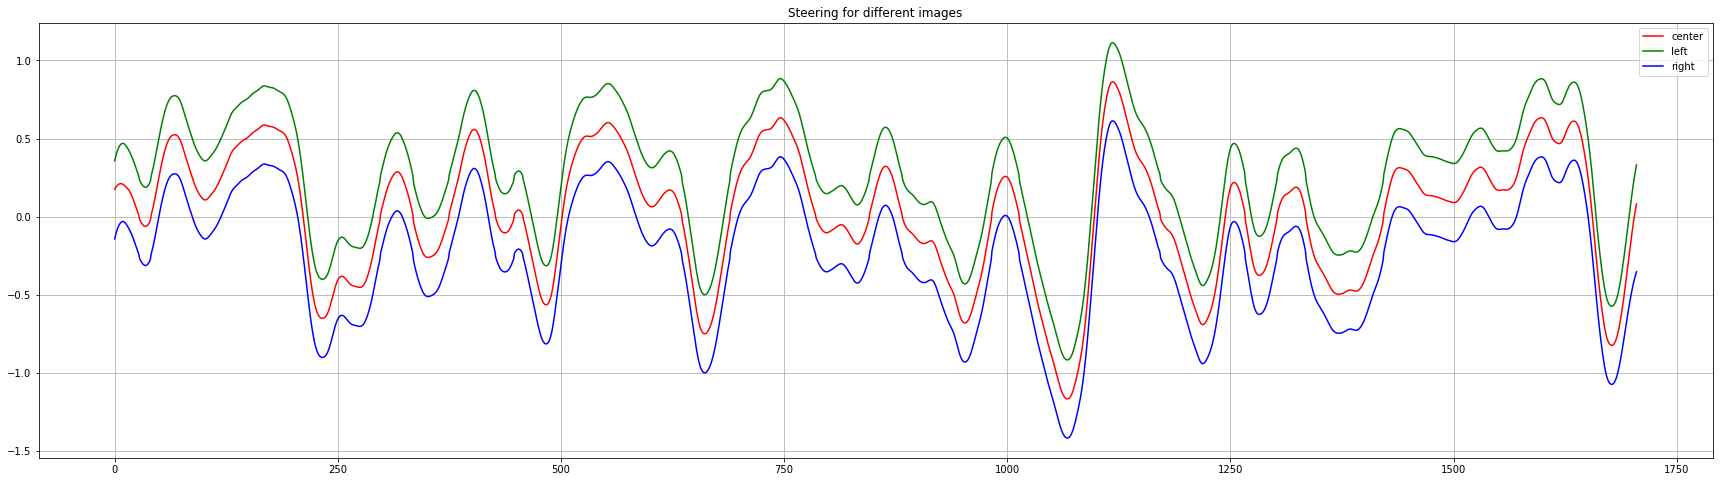

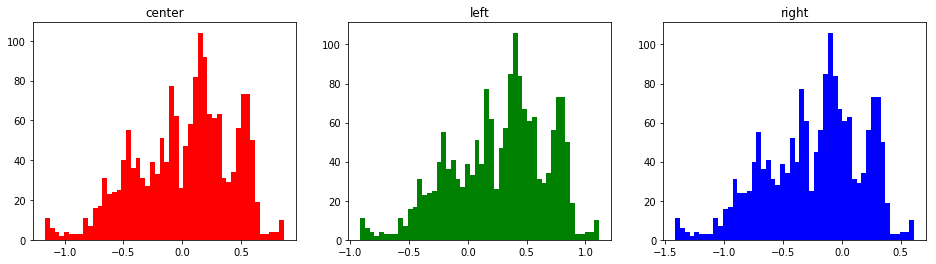

In [1]:
import utils
import numpy as np

path = 'data/track2-test/'
samples = utils.load_data(path,True)

Read  5184


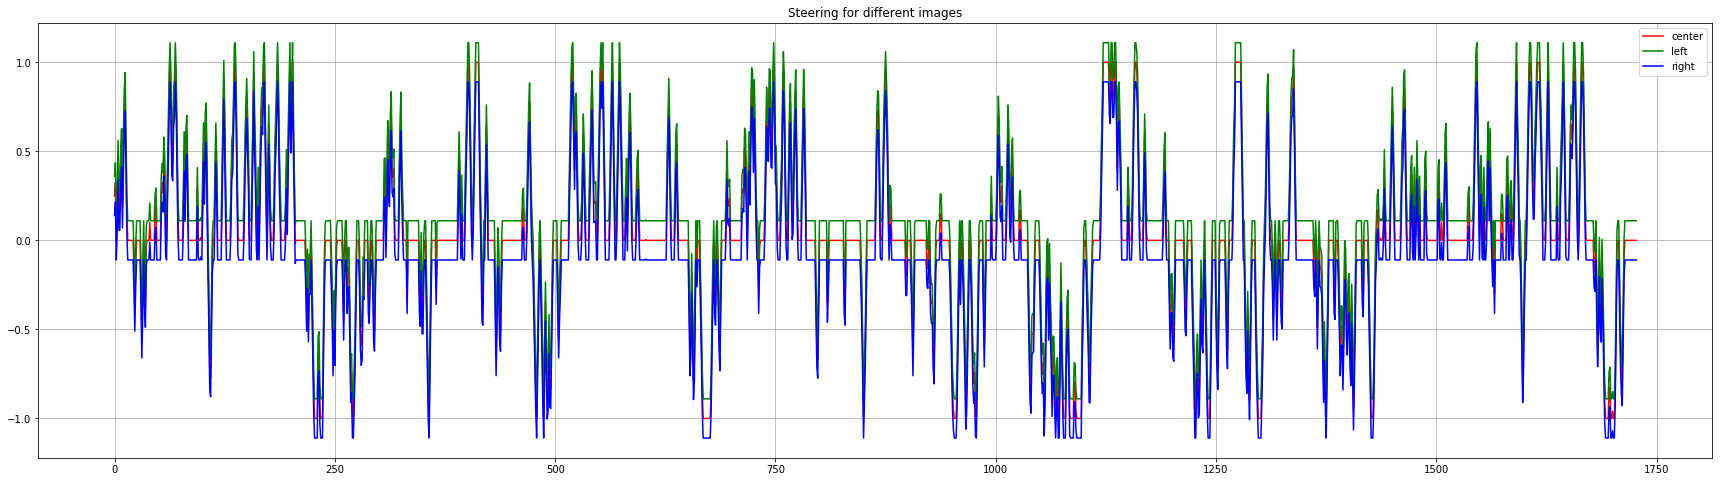

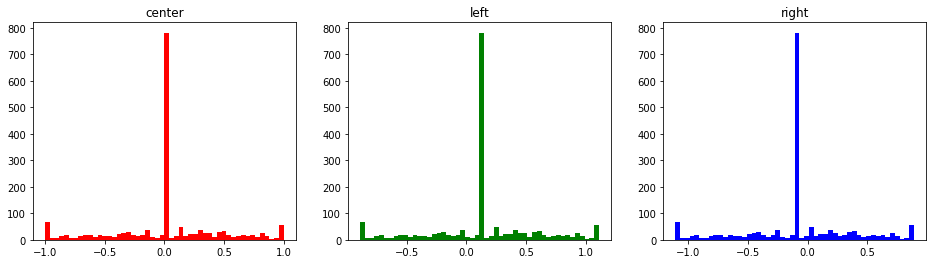

In [2]:
import utils
import numpy as np

path = 'data/track2-test/'
samples = utils.load_data(path,True)

Using TensorFlow backend.


Read  5184


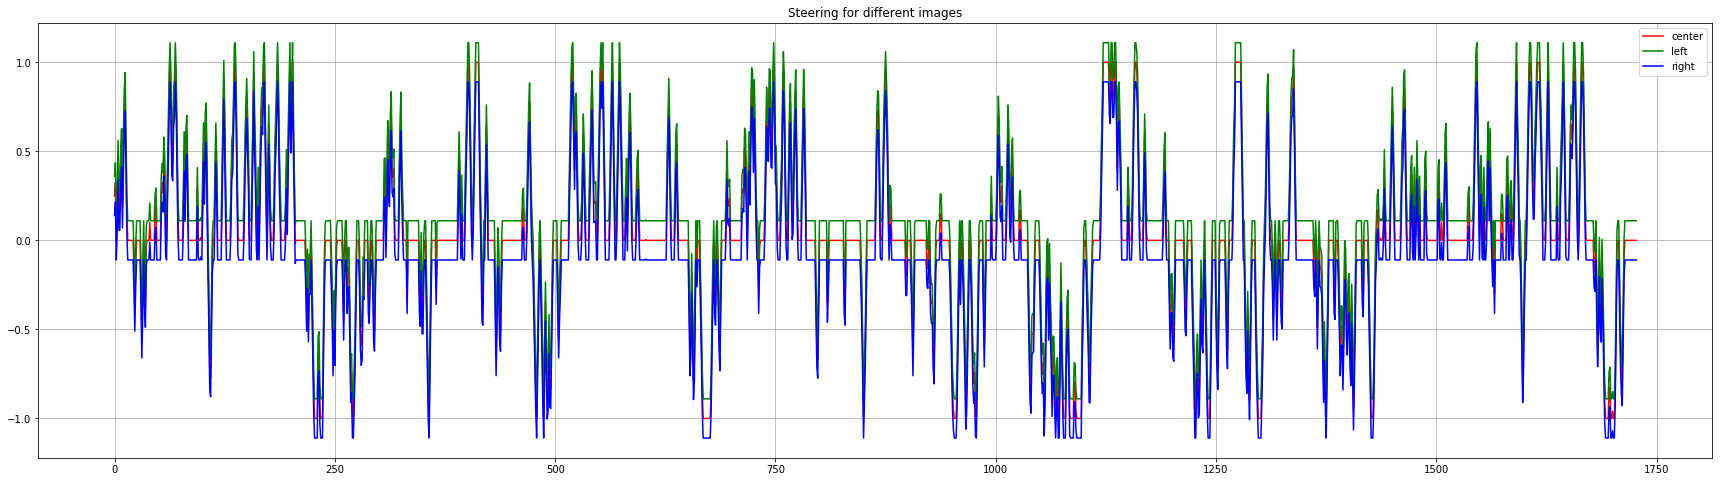

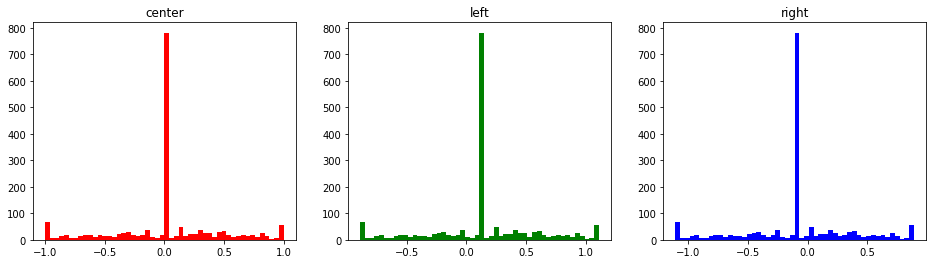

In [1]:
import utils
import numpy as np

path = 'data/track2-test/'
samples = utils.load_data(path,True)

In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt

path = 'data/track1-test/'
samples = utils.load_data(path)
gen = utils.generator(samples,32)

Using TensorFlow backend.


Read  4305
Samples are reduce from  4305  to  3859


Generated a fresh batch


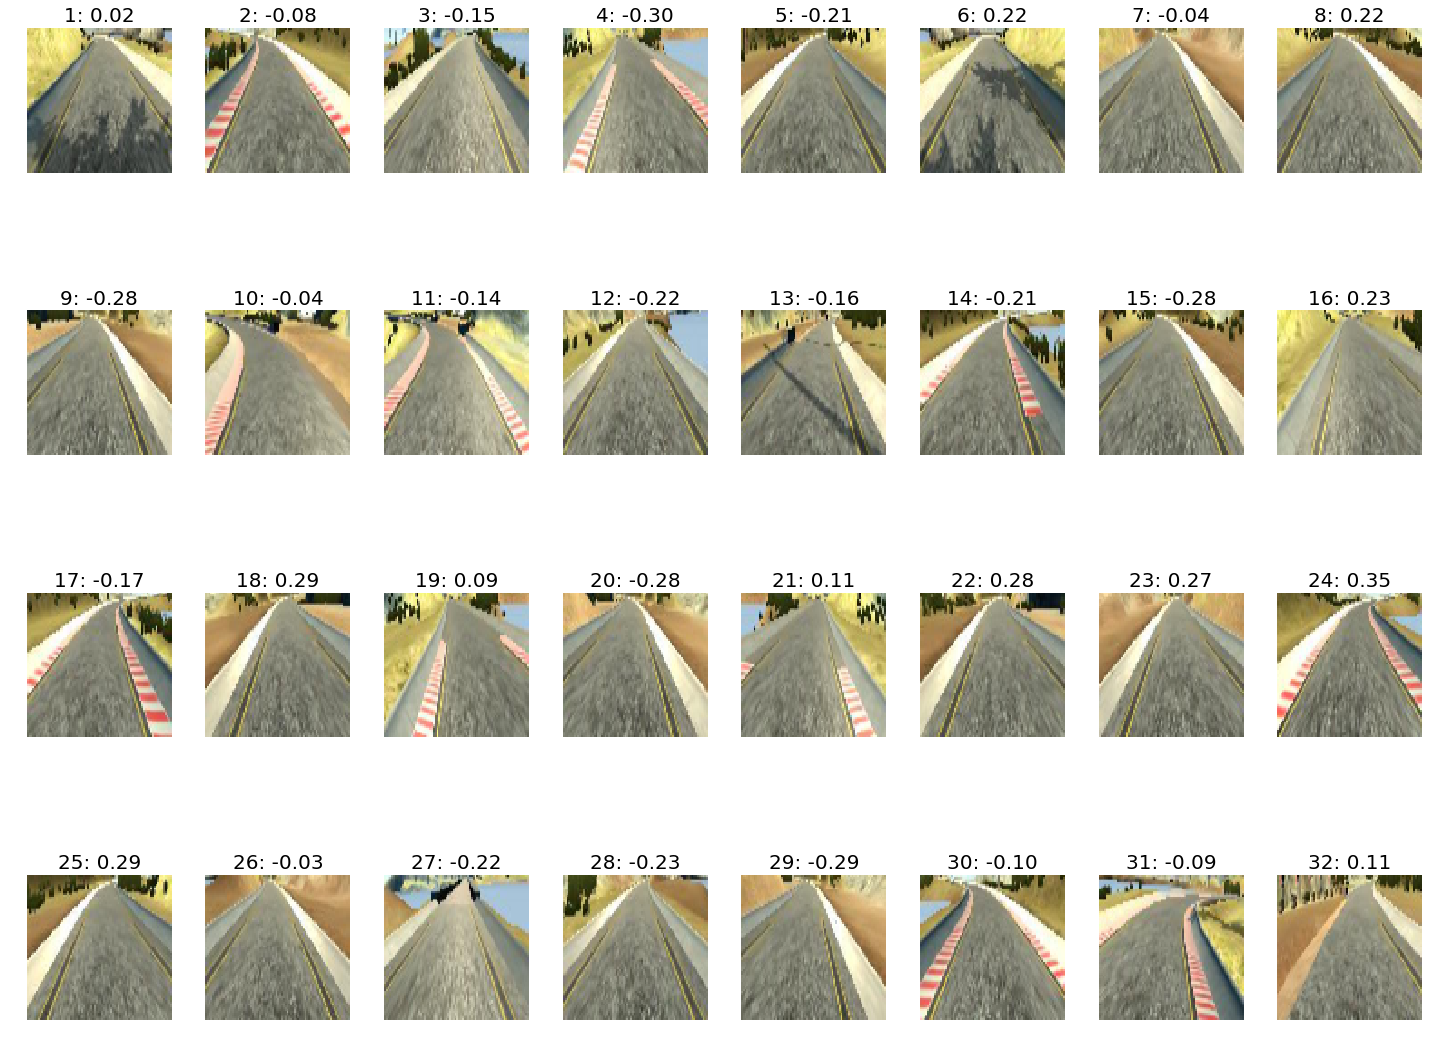

In [2]:
# Run the previous cell first
utils.plot_generator(gen)

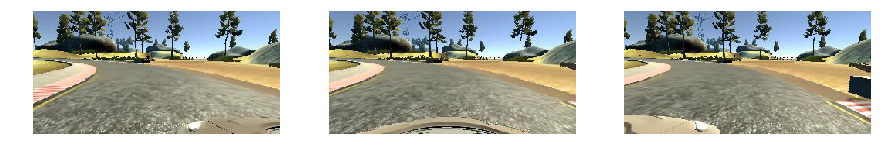

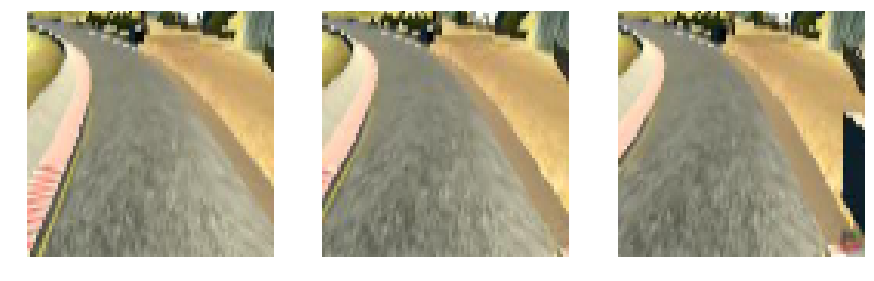

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def plot(images):
    plt.figure(figsize=(15,15))
    plt.subplot(1, 3, 1)
    plt.imshow(images[0])
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(images[1])
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(images[2])
    plt.axis('off')
    plt.show()

%matplotlib inline
# file = "data/track1-center/IMG/center_2017_06_10_00_43_05_338.jpg"
files = ["data/track1-center1/IMG/left_2017_06_10_17_28_39_772.jpg",
         "data/track1-center1/IMG/center_2017_06_10_17_28_39_772.jpg",
         "data/track1-center1/IMG/right_2017_06_10_17_28_39_772.jpg"]

imgs= [Image.open(files[0]),Image.open(files[1]),Image.open(files[2])]
img_cv = [utils.preprocess_image(np.array(imgs[0])),
          utils.preprocess_image(np.array(imgs[1])),
          utils.preprocess_image(np.array(imgs[2]))]
plot(imgs)
plot(img_cv)

Steering predict = 2.1094264462590218


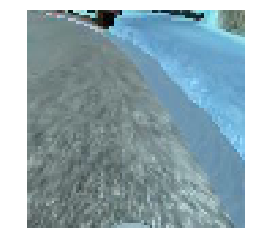

In [21]:
import os
path = 'correction'
files = os.listdir(path)
files = [os.path.join(path, file) for file in files]
print(files)

['correction/2017_06_19_01_39_41_722.jpg', 'correction/2017_06_19_02_39_58_524.jpg', 'correction/2017_06_19_01_39_41_547.jpg', 'correction/2017_06_19_02_39_58_550.jpg', 'correction/2017_06_19_02_39_58_500.jpg', 'correction/2017_06_19_02_39_57_408.jpg', 'correction/2017_06_19_02_36_22_796.jpg', 'correction/2017_06_19_01_39_41_606.jpg', 'correction/2017_06_19_02_39_58_773.jpg', 'correction/2017_06_19_02_39_57_924.jpg', 'correction/2017_06_19_01_39_41_813.jpg', 'correction/2017_06_19_02_39_58_618.jpg', 'correction/2017_06_19_02_39_58_025.jpg', 'correction/2017_06_19_02_39_57_431.jpg', 'correction/2017_06_19_02_36_22_925.jpg', 'correction/2017_06_19_02_39_57_457.jpg', 'correction/2017_06_19_02_36_22_700.jpg', 'correction/2017_06_19_02_39_58_666.jpg', 'correction/2017_06_19_01_39_41_788.jpg', 'correction/2017_06_19_02_39_57_585.jpg', 'correction/2017_06_19_02_39_58_224.jpg', 'correction/2017_06_19_02_39_57_875.jpg', 'correction/2017_06_19_02_39_57_764.jpg', 'correction/2017_06_19_01_39_41_6

Read  5184
Testing prediction on 2592 images
Plotting results  104


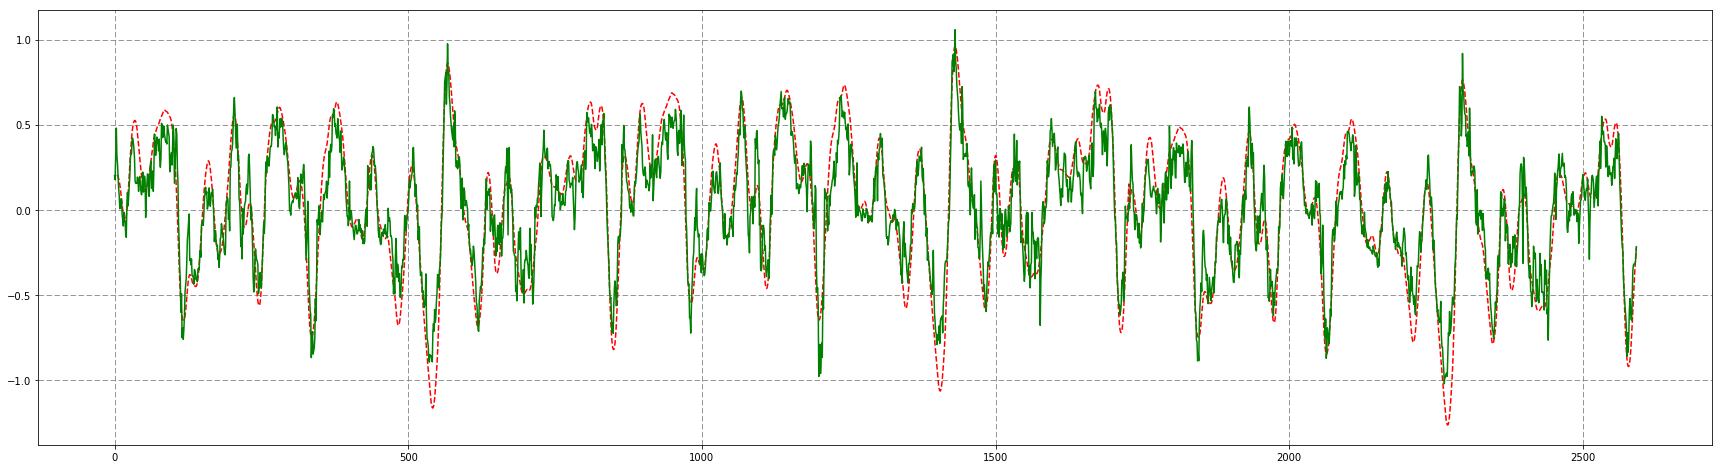

Result: [Ground truth | Prediction | Error]


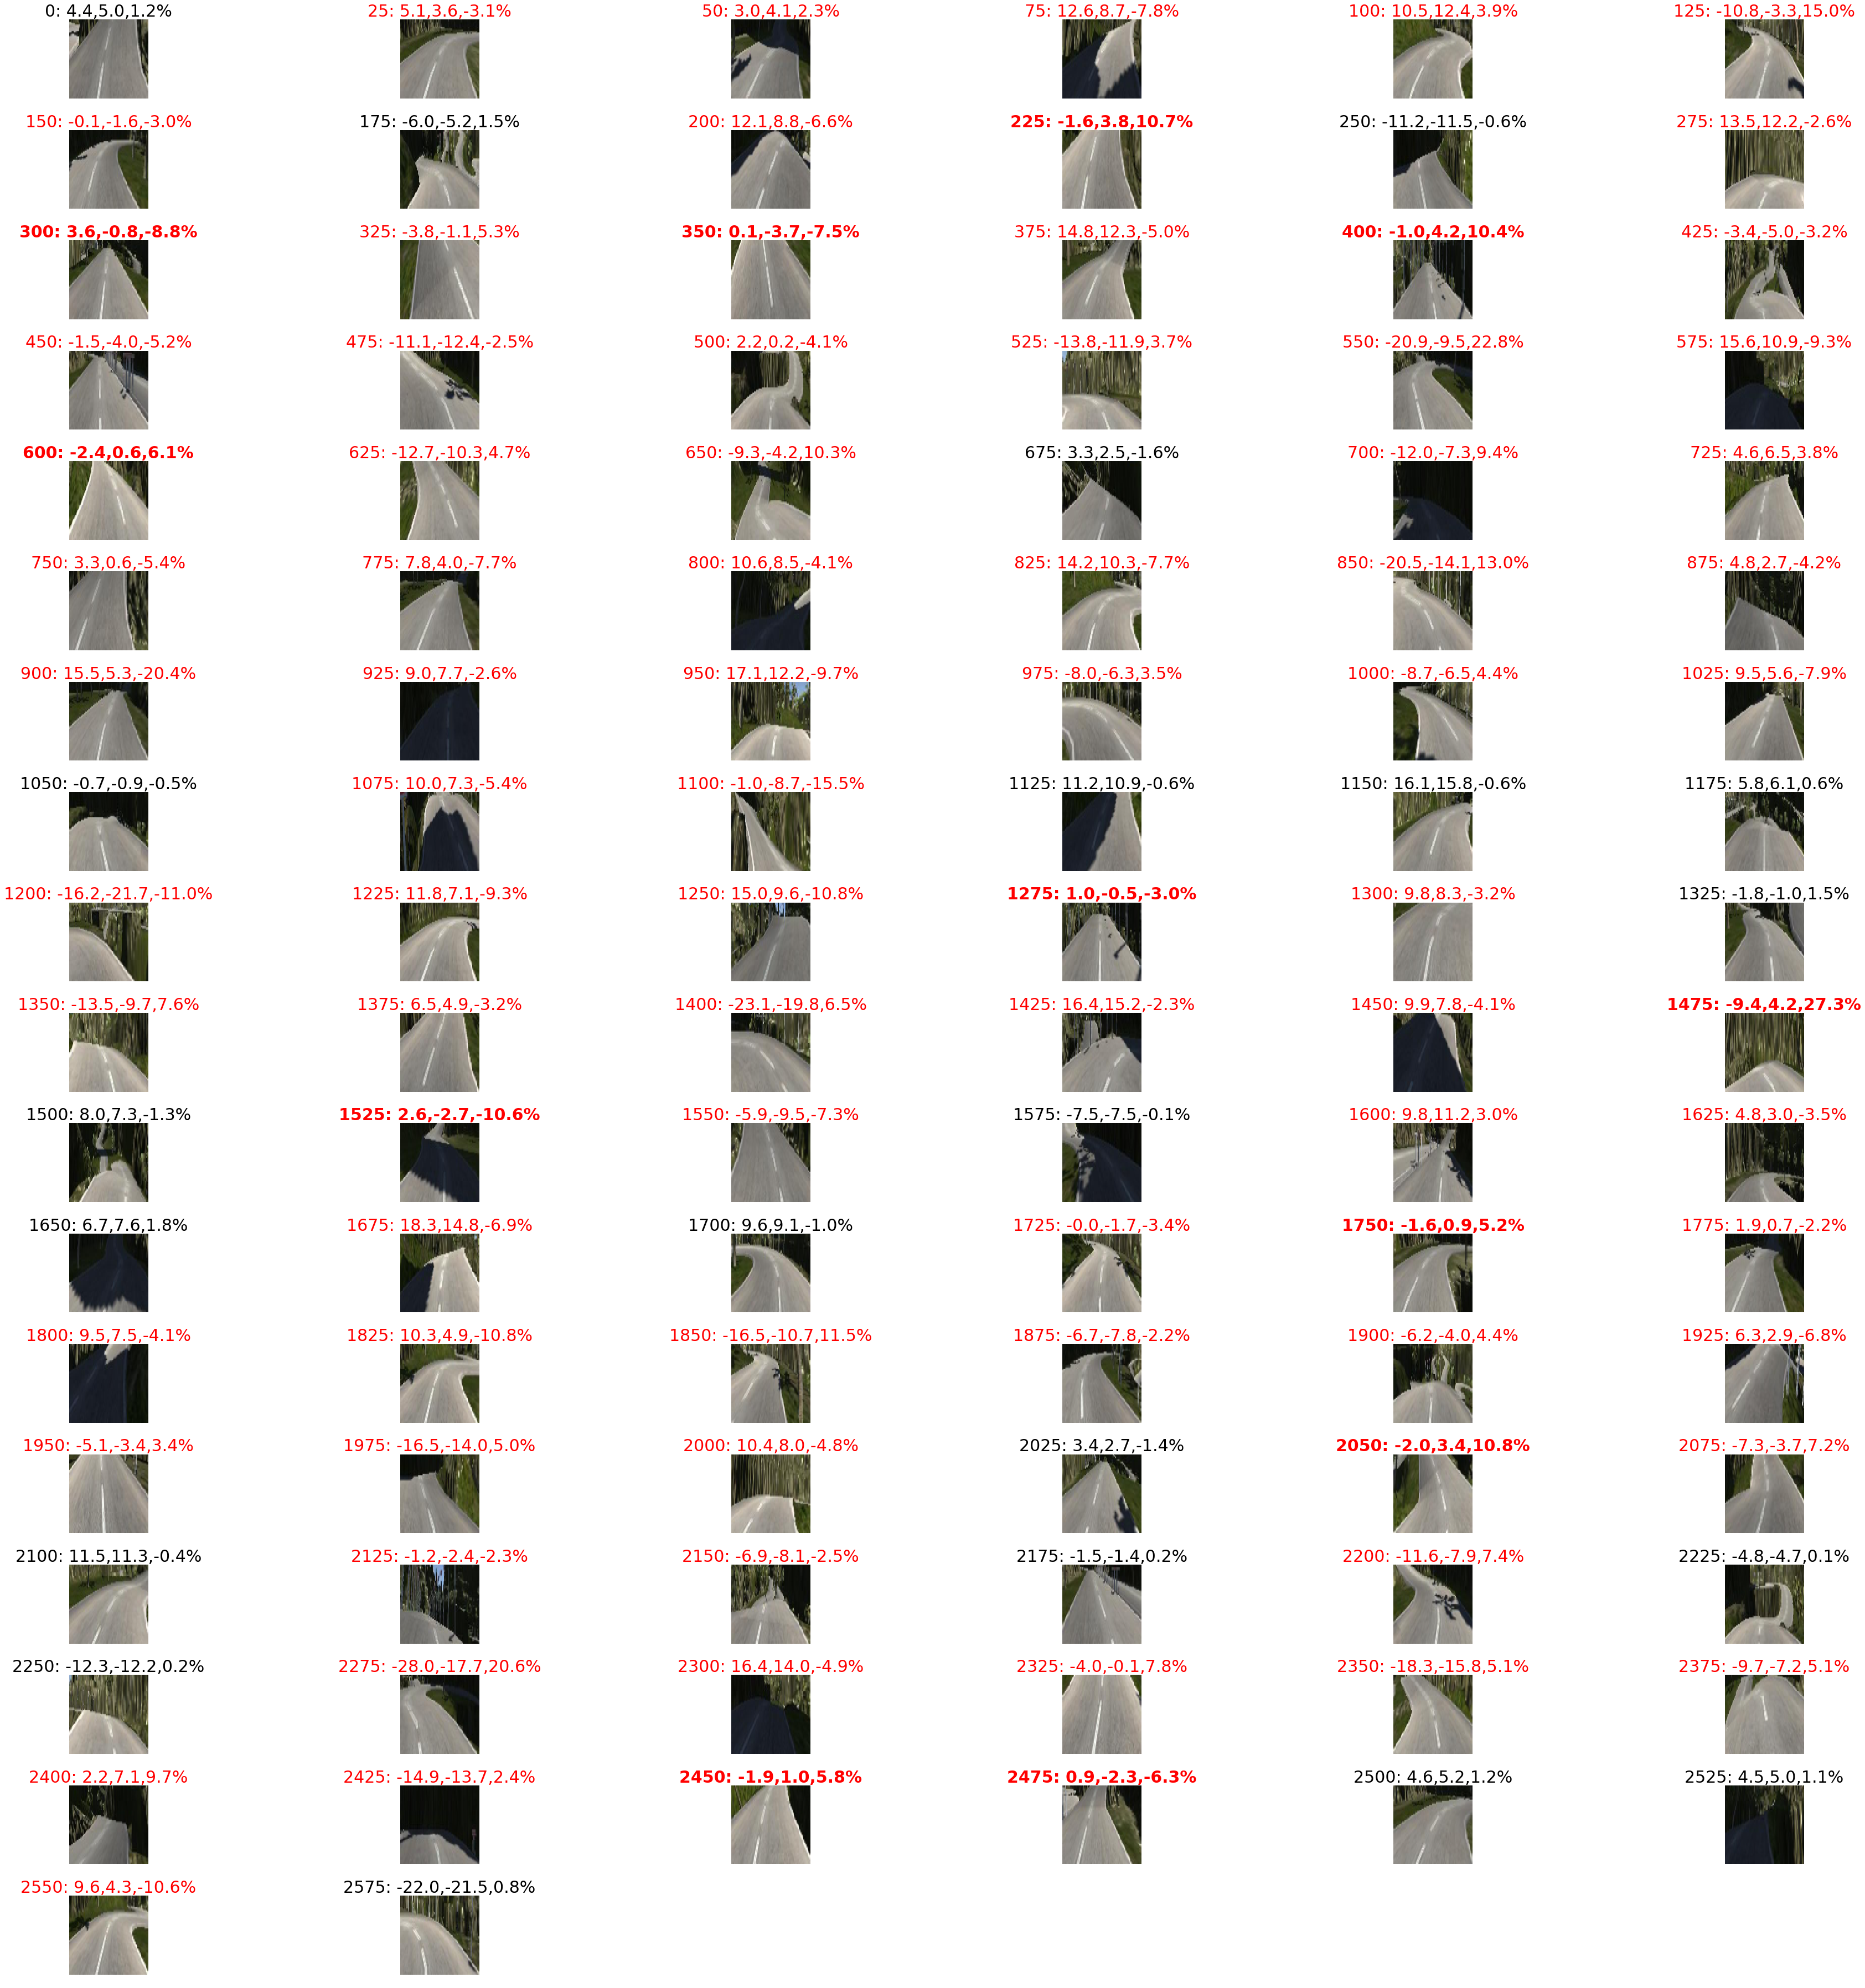

Test completed


In [11]:
import utils
utils.test_model('nvidia_t2_4.h5','data/track2-test/',True)

Read  6189
Testing prediction on 3095 images
Plotting results  124


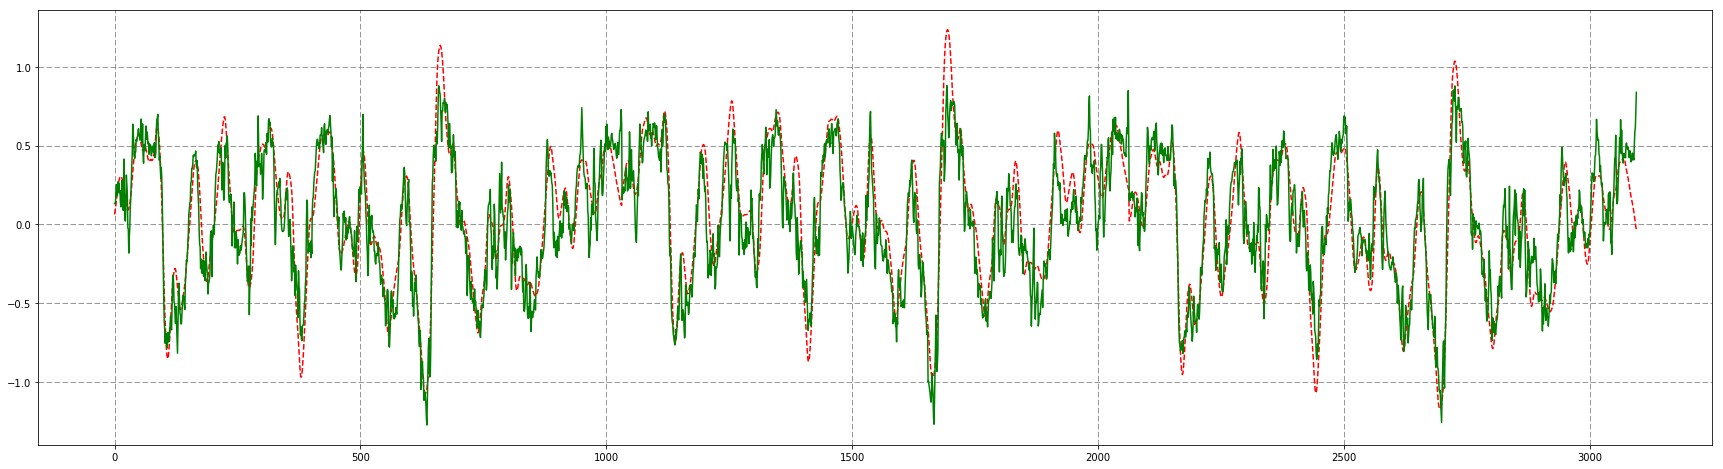

Test completed


In [7]:
import utils
utils.test_model('nvidia_t2.h5','data/track2-center/')

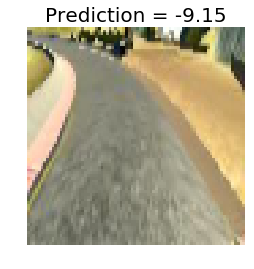

In [6]:
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import utils

#img_file = "data/track1-center1/IMG/right_2017_06_10_17_28_39_772.jpg"
img_file = "data/track1-center1/IMG/center_2017_06_10_17_28_39_772.jpg"

model = load_model('nvidia_t2_1.h5')
img = utils.open_image(img_file)
steering_angle = float(model.predict(img[None, :, :, :], batch_size=1))
plt.imshow(img)
plt.title("Prediction = {:.2f}".format(steering_angle*25),fontsize=20)
plt.axis('off')
plt.show()

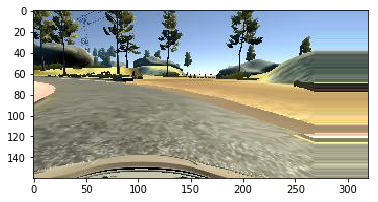

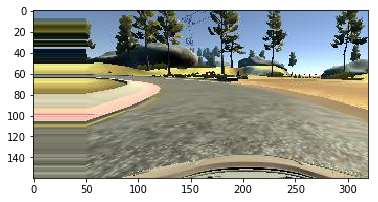

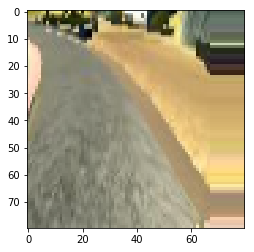

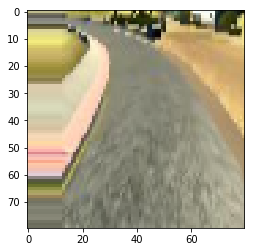

In [4]:
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import utils
import cv2

def offset_image(img,offset=50):
    img_left = img.copy()
    img_right = img.copy()
    # Shift left
    img_left[:,:img.shape[1]-offset] = img_left[:,offset:]
    img_left[:,img.shape[1]-offset:] = img[:,-1:]
    # Shift right
    img_right[:,offset:] = img_right[:,:img.shape[1]-offset]
    img_right[:,:offset]  = img[:,:1]
    return img_left,img_right

#img_file = "data/track1-center1/IMG/right_2017_06_10_17_28_39_772.jpg"
img_file = "data/track1-center1/IMG/center_2017_06_10_17_28_39_772.jpg"
#img = cv2.imread(img_file)
img = Image.open(img_file)
img = np.array(img)
# img_left = img.copy()
# img_right = img.copy()
# shift = 50
# plt.imshow(np.asarray(img)) 
# plt.show()

# # Shift left
# img_left[:,:img.shape[1]-shift] = img_left[:,shift:]
# img_left[:,img.shape[1]-shift:] = img[:,-1:]
# # Shift right
# img_right[:,shift:] = img_right[:,:img.shape[1]-shift]
# img_right[:,:shift]  = img[:,:1]
img_left,img_right = offset_image(img,50)

plt.imshow(img_left)
plt.show()
plt.imshow(img_right)
plt.show()

image_array = utils.preprocess_image(np.array(img_left))
plt.imshow(image_array)
plt.show()
image_array = utils.preprocess_image(np.array(img_right))
plt.imshow(image_array)
plt.show()

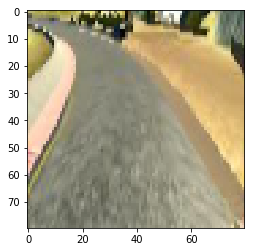

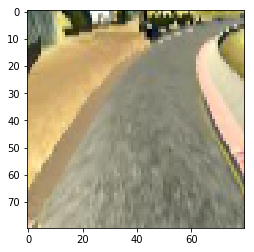

In [5]:
import utils
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

file1 = "data/track1-center1/IMG/center_2017_06_10_17_28_39_772.jpg"
img = utils.open_image(file1)
img1 = np.fliplr(img)
plt.imshow(img)
plt.show()
plt.imshow(img1)
plt.show()


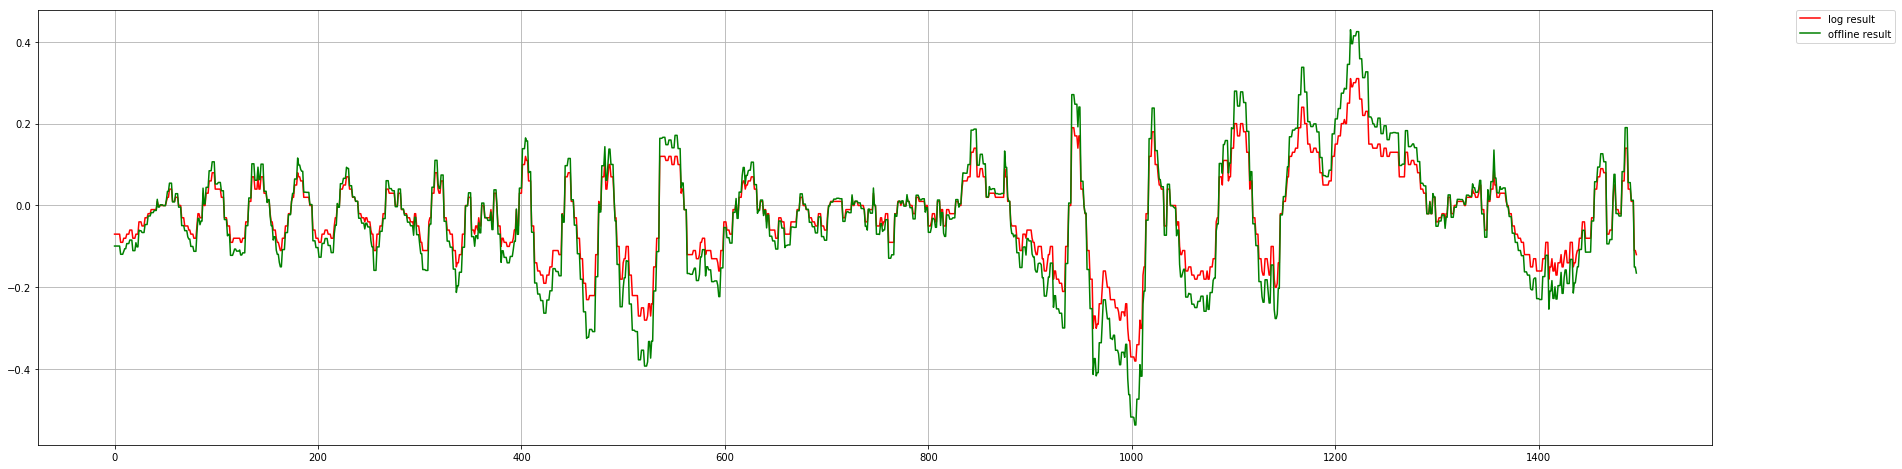

In [2]:
import utils

utils.plot_log("log/","log.txt","model-050.h5")

Using TensorFlow backend.


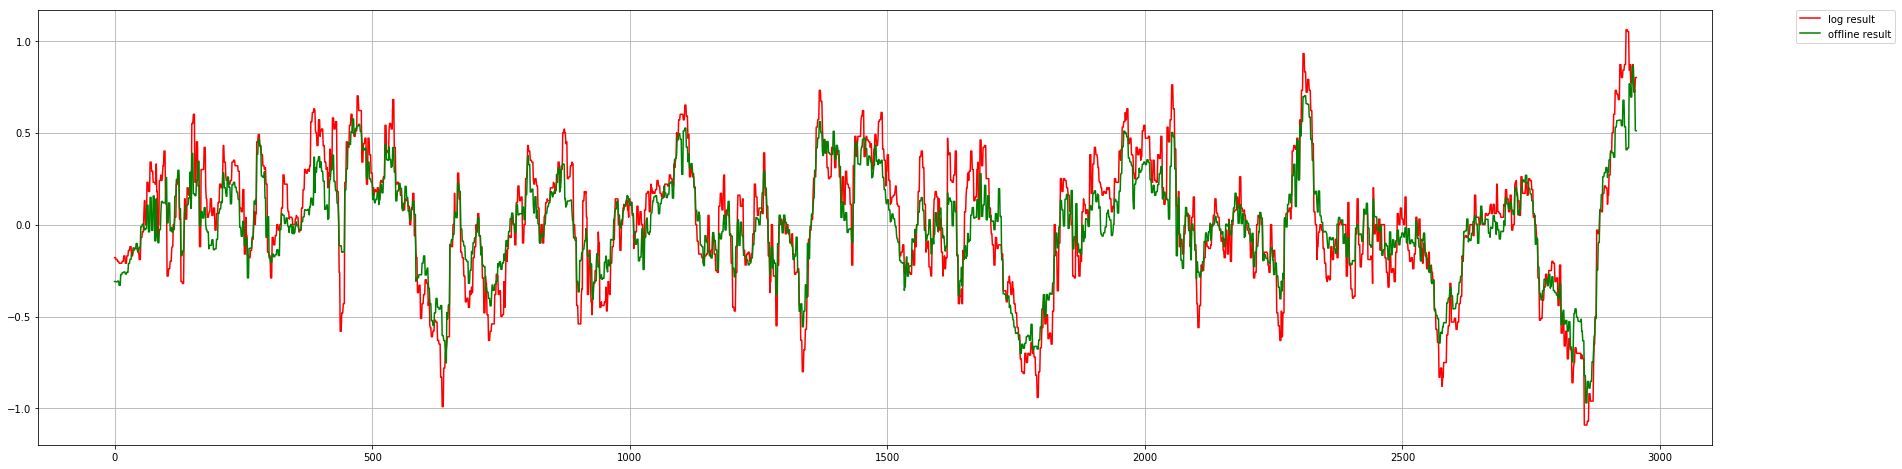

In [1]:
import utils
utils.plot_log("track2-log/log2/","track2-log/log2.txt","nvidia_t2.h5")

In [1]:
import utils

utils.visualize_log("log2","log2.txt","log_vis2")
utils.make_video("log_vis2")

Using TensorFlow backend.


Reading  4064  images
Open  4064  files
Creating image folder at log_vis2/
Process completed
Creating video log_vis2.mp4, FPS=60
[MoviePy] >>>> Building video log_vis2.mp4
[MoviePy] Writing video log_vis2.mp4


100%|██████████| 4064/4064 [00:10<00:00, 397.21it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: log_vis2.mp4 



In [12]:
import utils
model = utils.make_nvidia()
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 80, 80, 3)     0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 78, 78, 16)    448         lambda_1[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 39, 39, 16)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 37, 37, 32)    4640        maxpooling2d_1[0][0]             
___________________________________________________________________________________________

Using TensorFlow backend.


Read  5184
Samples are reduce from  5184  to  5052
Read  6189
Samples are reduce from  6189  to  5802
Read  5052
Samples are reduce from  5052  to  4799
Read  1611
Samples are reduce from  1611  to  1521
Read  723
Samples are reduce from  723  to  699
Read  795
Samples are reduce from  795  to  748


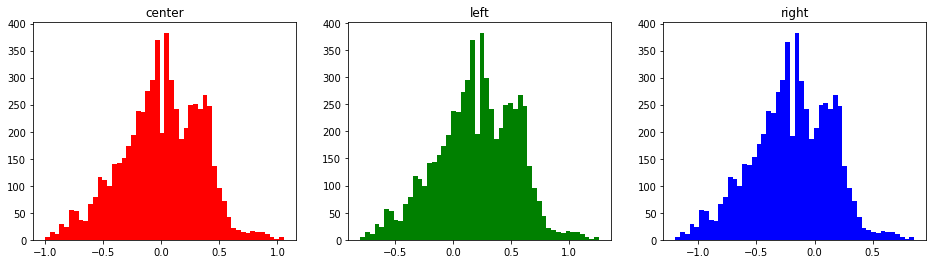

In [1]:
import utils
paths = ["data/track2-test/",
        "data/track2-center/",
        "data/track2-center1/",
        "data/track2-uphill/",
        "data/track2-downhill1/",
        "data/track2-stone/"]
samples = []
for path in paths:
    samples.extend(utils.load_data(path))
utils.plot_steering_distribution(samples)

Using TensorFlow backend.


Read  5184
Read  6189
Read  5052
Read  1611
Read  723
Read  795


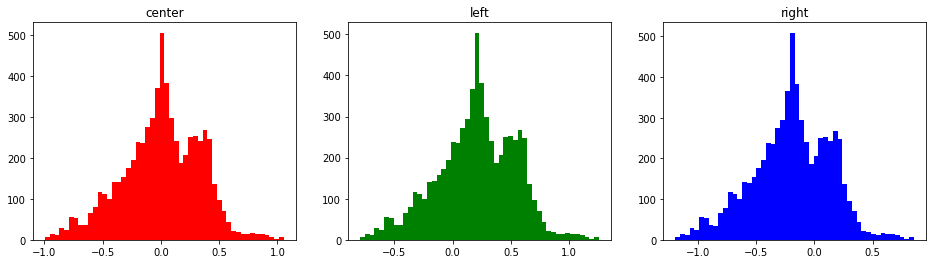

In [1]:
import utils
paths = ["data/track2-test/",
        "data/track2-center/",
        "data/track2-center1/",
        "data/track2-uphill/",
        "data/track2-downhill1/",
        "data/track2-stone/"]
samples = []
for path in paths:
    samples.extend(utils.load_data(path))
utils.plot_steering_distribution(samples)